# Exercise - Constrained Optimization

$$
\newcommand{\E}{E}
\newcommand{\rbar}{\bar{r}}
\newcommand{\rvec}{\boldsymbol{r}}
\newcommand{\rvecbar}{\boldsymbol{\bar{r}}}
\newcommand{\Ntime}{N}
\newcommand{\Nt}{N}
\newcommand{\rmat}{\boldsymbol{R}}
\newcommand{\riskmeasure}{\varrho}
\newcommand{\wt}{w}
\newcommand{\Nassets}{K}
\newcommand{\muvec}{\boldsymbol{\mu}}
\newcommand{\onevecNt}{\boldsymbol{1}_{\Ntime\times 1}}
\newcommand{\covest}{\hat{\boldsymbol{\Sigma}}}
\newcommand{\meanest}{\hat{\mu}}
\newcommand{\meanestvec}{\hat{\boldsymbol{\mu}}}
\newcommand{\covmat}{\boldsymbol{\Sigma}}
\newcommand{\rf}{r_f}
\newcommand{\VaR}{\text{VaR}}
\newcommand{\VaRqtau}{\VaR_{q,\tau}}
\newcommand{\pnlVaR}{\pnl^{\VaR}}
\newcommand{\pnlVaRqtau}{\pnl^{\VaR_{q,\tau}}}
\newcommand{\rVaR}{r^{\VaR}}
\newcommand{\rVaRqtau}{r^{\VaR_{q,\tau}}}
\newcommand{\loss}{L}
\newcommand{\Pr}{\mathbb{P}}
\newcommand{\quant}{q}
\newcommand{\port}{\Pi}
\newcommand{\pnl}{\Gamma}
\newcommand{\cdf}{\Phi}
\newcommand{\pdf}{\phi}
\newcommand{\zscore}{\texttt{z}}
\newcommand{\cdfz}{\cdf_{\zscore}}
\newcommand{\pdfz}{\pdf_{\zscore}}
\newcommand{\rlog}{\texttt{r}}
\newcommand{CVaR}{\text{CVaR}}
\newcommand{CVaRqtau}{\CVaR_{q,\tau}}
\newcommand{\pnlCVaR}{\pnl^\CVaR}
\newcommand{\pnlCVaRqtau}{\pnl^{\CVaR_{q,\tau}}}
\newcommand{\rCVaR}{r^\CVaR}
\newcommand{\rCVaRqtau}{r^{\CVaR_{q,\tau}}}
\newcommand{\rx}{\tilde{r}}
\newcommand{\mux}{\tilde{\mu}}
\newcommand{\sigx}{\tilde{\sigma}}
\newcommand{\Nsec}{K}
\newcommand{\avg}{\text{avg}}
\newcommand{\wtvec}{\boldsymbol{\wt}}
\newcommand{\muxvec}{\boldsymbol{\mux}}
\newcommand{\tan}{\text{tan}}
$$

## Data

All the analysis below applies to the data set,
* `data/spx_weekly_returns.xlsx`
* The file has **weekly** returns.
* For annualization, use 52 periods per year.

Consider only the following 10 stocks...

In [ ]:
TICKS =  ['AAPL','NVDA','MSFT','GOOGL','AMZN','META','TSLA','AVGO','BRK/B','LLY']

As well as the ETF,

In [ ]:
TICK_ETF = 'SPY'

### Data Processing

In [ ]:
import pandas as pd

In [ ]:
INFILE = '../data/spx_returns_weekly.xlsx'
SHEET_INFO = 's&p500 names'
SHEET_RETURNS = 's&p500 rets'
SHEET_BENCH = 'benchmark rets'

FREQ = 52

In [ ]:
info = pd.read_excel(INFILE,sheet_name=SHEET_INFO)
info.set_index('ticker',inplace=True)
info.loc[TICKS]

,name,mkt cap
ticker,,
AAPL,Apple Inc,3.008822e+12
NVDA,NVIDIA Corp,3.480172e+12
MSFT,Microsoft Corp,3.513735e+12
GOOGL,Alphabet Inc,2.145918e+12
AMZN,Amazon.com Inc,2.303536e+12
META,Meta Platforms Inc,1.745094e+12
TSLA,Tesla Inc,9.939227e+11
AVGO,Broadcom Inc,1.148592e+12
BRK/B,Berkshire Hathaway Inc,1.064240e+12


In [ ]:
rets = pd.read_excel(INFILE,sheet_name=SHEET_RETURNS)
rets.set_index('date',inplace=True)
rets = rets[TICKS]

In [ ]:
bench = pd.read_excel(INFILE,sheet_name=SHEET_BENCH)
bench.set_index('date',inplace=True)
rets[TICK_ETF] = bench[TICK_ETF]

# 1 Constrained Optimization for Mean-Variance

Continue working with the data above. Suppose we want to constrain the weights such that 
* there are no short positions beyond negative `20%`,
  $w_i\ge -.20$ for all $i$
* none of the positions may have weight over `35%`,
  $w_i \le .35$ for all $i$.
* all the asset weights must sum to 1

Furthermore, 
* The targeted mean return is `20%` per year.
* Be careful; the target is an annualized mean.

Consider using the code below as a starting point.

## 1.1. 

Report the weights of the constrained portfolio.

Report the mean, volatility, and Sharpe ratio of the resulting portfolio.

### 1.2.

Compare these weights to the assets' Sharpe ratios and means.

Do the most extreme positions also have the most extreme Sharpe ratios and means?

Why?

### 1.3.

Compare the bounded portfolio weights to the unbounded portfolio weights (obtained from optimizing without the inequality constraints, keeping the equality constraints.)

Report the mean, volatility, and Sharpe ratio of both.

***

## Code Help

The `minimize` function will be how we optimize.

In [ ]:
from scipy.optimize import minimize

Build the objective functions.

Before doing this, you will need to define 
* `TARGET_MEAN`
* `FREQ`
* `cov`
* `mean`

In [ ]:
# def objective(w):        
#     return (w.T @ cov @ w)

# def fun_constraint_capital(w):
#     return np.sum(w) - 1

# def fun_constraint_mean(w):
#     return (mean @ w) - TARGET_MEAN

Build the constraints
* sum of weights add to one
* weighted average of means is the target mean

In [ ]:
# constraint_capital = {'type': 'eq', 'fun': fun_constraint_capital}
# constraint_mean = {'type': 'eq', 'fun': fun_constraint_mean}

# constraints = ([constraint_capital, constraint_mean])

Build the upper and lower bounds on each asset.

You will need to use the `minimize` function along with these contraints, bounds, and an initial guess.

***

# <span style="color:red">Solutions</span>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['font.size'] = 13
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

In [ ]:
from cmds.portfolio import *
from cmds.risk import *
#from cmds.plot_tools import plot_triangular_matrix

from cmds.mvportfolio import MVweights

In [ ]:
def optimized_weights(returns,dropna=True,scale_cov=1):
    if dropna:
        returns = returns.dropna()

    covmat_full = returns.cov()
    covmat_diag = np.diag(np.diag(covmat_full))
    covmat = scale_cov * covmat_full + (1-scale_cov) * covmat_diag

    weights = np.linalg.solve(covmat,returns.mean())
    weights = weights / weights.sum()

    if returns.mean() @ weights < 0:
        weights = -weights

    return pd.DataFrame(weights, index=returns.columns)

***

# <span style="color:red">1. Optimized Portfolios</span>

In [ ]:
DO_EXCESS = True
USE_RF_ZERO = True

In [ ]:
if USE_RF_ZERO:
    rf = 0
else:
    rf = bench['SHV']

retsx = rets.sub(rf)

if DO_EXCESS:
    r = retsx
else:
    r = rets

In [ ]:
temp = performanceMetrics(r,annualization=FREQ).drop(columns=['Min','Max'])
temp.sort_values('Sharpe',ascending=False).style.format('{:.2%}',na_rep='')

,Mean,Vol,Sharpe
NVDA,64.56%,46.33%,139.35%
MSFT,26.14%,24.00%,108.93%
AVGO,39.49%,37.51%,105.26%
LLY,28.15%,28.30%,99.49%
AMZN,29.34%,30.60%,95.90%
AAPL,23.87%,27.66%,86.29%
TSLA,46.98%,58.64%,80.10%
GOOGL,21.68%,27.99%,77.47%
SPY,13.13%,17.09%,76.82%
META,26.19%,35.13%,74.55%


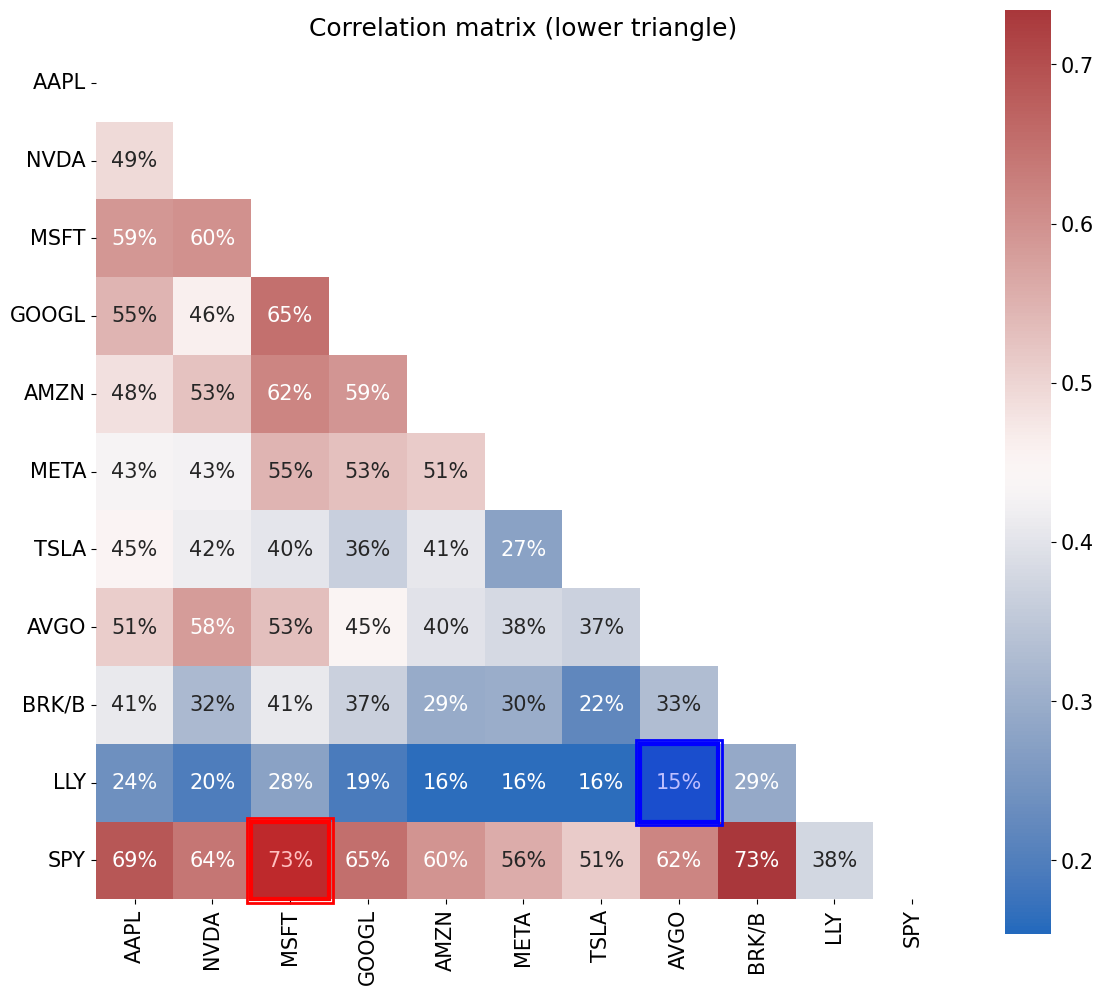

In [ ]:
corr_matrix = r.corr()
from cmds.plot_tools import plot_corr_matrix
plot_corr_matrix(r,triangle='lower',figsize=(12,12))
plt.show()

In [ ]:
mean = r.mean() * FREQ
cov = r.cov() * FREQ
Nassets = r.shape[1]

In [ ]:
MINBOUND = -.10
MAXBOUND = .35
TARGET_MEAN = .20

In [ ]:
def objective(w):        
    return (w.T @ cov @ w)
    
def fun_constraint_capital(w):
    return np.sum(w) - 1

def fun_constraint_mean(w):
    return (mean @ w) - TARGET_MEAN

constraint_capital = {'type': 'eq', 'fun': fun_constraint_capital}
constraint_mean = {'type': 'eq', 'fun': fun_constraint_mean}

if DO_EXCESS:
    constraints = ([constraint_mean])
else:
    constraints = ([constraint_capital, constraint_mean])

In [ ]:
bounds_df = pd.DataFrame(index=rets.columns,columns=['Min','Max'],dtype=float)
bounds_df['Min'] = MINBOUND
bounds_df['Max'] = MAXBOUND
bounds = [tuple(bounds_df.iloc[i,:].values) for i in range(Nassets)]

In [ ]:
wstar = pd.DataFrame(index=temp.index,columns=['equal','bounded','unbounded'],dtype=float)
wstar['equal'] = np.ones(len(wstar.index))/Nassets

In [ ]:
TOL = 1e-8
METHOD = 'SLSQP'
#METHOD = 'trust-constr'

w0 = np.ones(Nassets) / Nassets

solution_unbounded = minimize(objective, w0, method=METHOD, constraints=constraints, tol=TOL)
solution_bounded = minimize(objective, w0, method=METHOD, bounds=bounds, constraints=constraints, tol=TOL)
wstar['bounded'] = solution_bounded.x
wstar['unbounded'] = solution_unbounded.x

#wstar['analytic'] = optimized_weights(r,dropna=True,scale_cov=1)
wstar['analytic'] = MVweights(mean=mean,cov=cov,isexcess=DO_EXCESS,target=TARGET_MEAN)

if solution_bounded.success and solution_unbounded.success:
    print('Optimization SUCCESSFUL.')
else:
    print('Optimization FAILED.')

print(f'Iterations: {solution_bounded.nit}.')

Optimization SUCCESSFUL.
Iterations: 19.


## <span style="color:red">1.1, 1.3. Portfolio Stats</span>

In [ ]:
wstar.sort_values('bounded',ascending=False).style.format('{:.2%}')

,equal,bounded,unbounded,analytic
LLY,9.09%,19.03%,17.12%,17.09%
NVDA,9.09%,15.30%,13.55%,13.56%
AVGO,9.09%,6.30%,9.25%,9.24%
AMZN,9.09%,5.80%,6.52%,6.55%
BRK/B,9.09%,5.75%,39.63%,39.63%
MSFT,9.09%,4.38%,13.04%,13.03%
TSLA,9.09%,2.07%,4.76%,4.76%
META,9.09%,0.66%,4.27%,4.26%
AAPL,9.09%,-1.71%,6.29%,6.29%
GOOGL,9.09%,-3.55%,2.98%,2.97%


In [ ]:
corr_weights = wstar.drop(columns=['equal']).corr().iloc[0,1]
display(f'Correlation between BOUNDED and UNBOUNDED is: {corr_weights:.1%}')

'Correlation between BOUNDED and UNBOUNDED is: 63.8%'

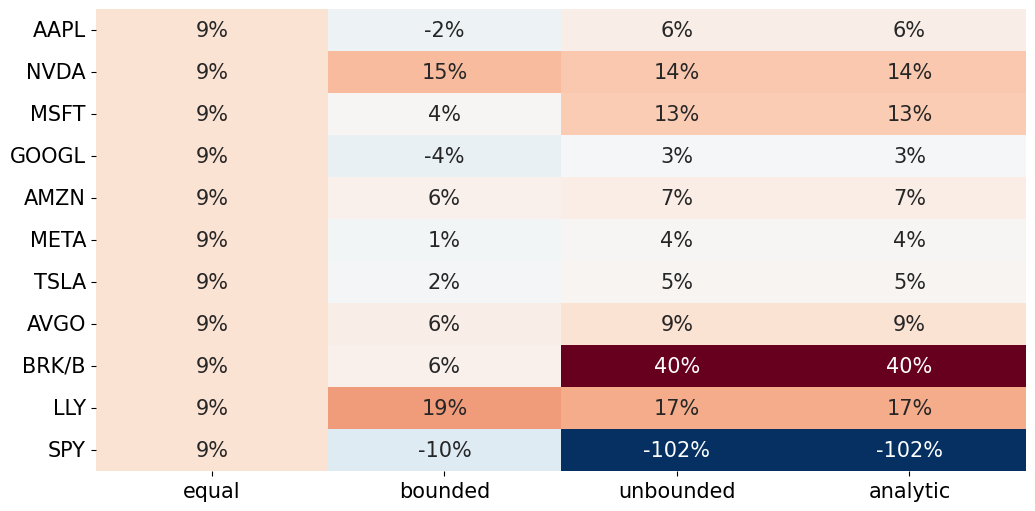

In [ ]:
from cmds.plot_tools import plot_triangular_matrix
plot_triangular_matrix(wstar, full_matrix=True)
plt.show()

In [ ]:
optimized = pd.DataFrame(index=['equal', 'bounded', 'unbounded'], columns=['mean','vol'],dtype=float)

optimized.loc['equal','mean'] = wstar['equal'] @ mean
optimized.loc['equal','vol'] = np.sqrt(wstar['equal'] @ cov @ wstar['equal'])

optimized.loc['bounded','mean'] = wstar['bounded'] @ mean
optimized.loc['bounded','vol'] = np.sqrt(wstar['bounded'] @ cov @ wstar['bounded'])

optimized.loc['unbounded','mean'] = wstar['unbounded'] @ mean
optimized.loc['unbounded','vol'] = np.sqrt(wstar['unbounded'] @ cov @ wstar['unbounded'])

optimized.loc['analytic','mean'] = wstar['analytic'] @ mean
optimized.loc['analytic','vol'] = np.sqrt(wstar['analytic'] @ cov @ wstar['analytic'])

optimized['sharpe'] = optimized['mean'] / optimized['vol']

optimized.style.format('{:.2%}')

,mean,vol,sharpe
equal,30.28%,22.16%,136.64%
bounded,20.00%,11.92%,167.83%
unbounded,20.00%,9.67%,206.85%
analytic,20.00%,9.67%,206.85%


***

## <span style="color:red">1.2. Comparison with Stand-alone Metrics</span>

Consider how the most extreme positions compare to the most extreme Sharpe Ratios.

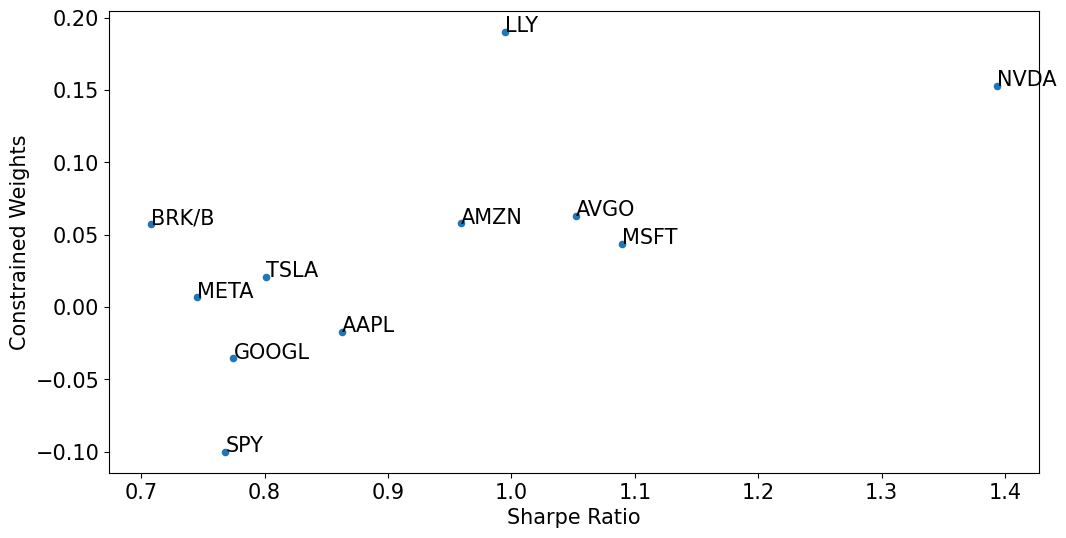

In [ ]:
df = pd.concat([wstar[['bounded']],temp[['Sharpe']]],axis=1).sort_values('Sharpe',ascending=False)
ax = df.plot.scatter(x='Sharpe',y='bounded')
ax.set_xlabel('Sharpe Ratio')
ax.set_ylabel('Constrained Weights')
for idx, row in df.iterrows():
    ax.annotate(idx, (row['Sharpe'], row['bounded']))

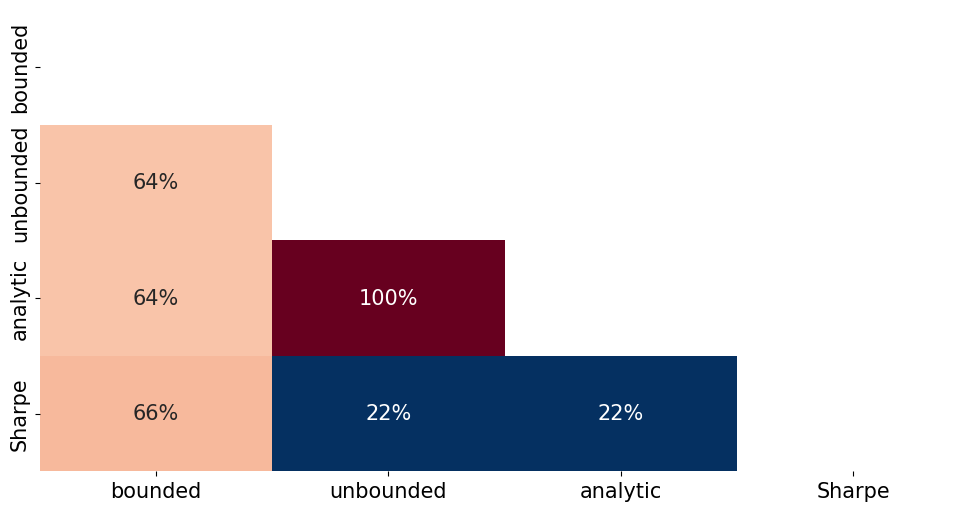

In [ ]:
temp = pd.concat([wstar,temp[['Sharpe']]],axis=1).drop(columns=['equal']).corr()
plot_triangular_matrix(temp,full_matrix=False)

***

## <span style="color:red">Costs of the Bounds</span>

Using the LaGrangian...

In [ ]:
warnings.filterwarnings("ignore", message="delta_grad == 0.0. Check if the approximated function is linear.")

TOL = 1e-12
METHOD = 'trust-constr'

w0 = wstar['bounded']
solutionALT = minimize(objective, w0, method=METHOD, bounds=bounds,constraints=constraints, tol=TOL)

pd.DataFrame(solutionALT.v[-1], index=mean.index, columns=['Lagrange Multipliers']).sort_values('Lagrange Multipliers',ascending=False).style.format('{:.2%}'.format)

,Lagrange Multipliers
MSFT,0.00%
AMZN,0.00%
GOOGL,0.00%
AAPL,0.00%
AVGO,0.00%
META,0.00%
TSLA,0.00%
BRK/B,-0.00%
NVDA,-0.00%
LLY,-0.00%


***